# データ解析特論第３回

## 相関係数と相関係数の検定

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

相関のある２変数の乱数を生成
$$
X_i \sim N(\mu, \Sigma) \enspace,
$$
ここで，
* 平均ベクトル：$\mu = (0, 0)$
* 共分散行列：$\Sigma = U \cdot D \cdot U^\mathrm{T}$

In [6]:
mu = np.zeros(2)  # 平均ベクトル
D = np.diag([1.0, 0.5])  # 固有値
rot = np.pi / 6.0  # 回転角
U = np.array([[np.cos(rot), np.sin(rot)], [-np.sin(rot), np.cos(rot)]])  # 固有ベクトル（回転ベクトル）
Cov = U @ D @ U.T  # 共分散行列

In [7]:
mydata = stats.multivariate_normal.rvs(mean=mu, cov=Cov, size=300)
#正規分布からデータの生成

散布図を確認．相関を確認する場合，x軸とy軸のスケールをあわせることが必要．

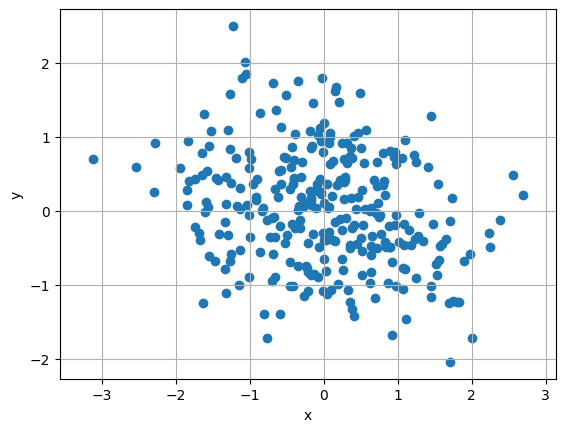

In [ ]:
#標本の確認
fig = plt.figure()
plt.scatter(mydata[:, 0], mydata[:, 1])
plt.axis('equal')
#横軸と縦軸のメモリの感覚が同じになる
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

相関係数の計算には scipy.stats.pearsonr 関数が利用できる．
第一出力 r は相関係数，第二出力は相関検定を行った場合のp値

In [ ]:
r, p = stats.pearsonr(mydata[:, 0], mydata[:, 1])
#stats.pearsonr(確率変数の標本,確率変数の標本)
print("相関係数（ピアソンの相関係数r）：", r)
print("p値：", p)
#p値が誘導水準以下だと棄却できる。
#誘導水準を0.05とすると今回は棄却できる

相関係数（ピアソンの相関係数r）： -0.2570157730149881
p値： 6.512410507564456e-06


母相関係数は（データ分布を知っているので）以下のように計算できる

In [10]:
r_true = Cov[0, 1] / np.sqrt(Cov[0, 0] * Cov[1, 1])
print(r_true)

-0.29277002188455986


相関係数の検定

In [23]:
mydata = stats.multivariate_normal.rvs(mean=mu, cov=Cov, size=30)  # データ数を30に減らした
r, p = stats.pearsonr(mydata[:, 0], mydata[:, 1])
print("相関係数（ピアソンの相関係数r）：", r)
print("p値：", p)

相関係数（ピアソンの相関係数r）： -0.39596568966339524
p値： 0.030307308722531005


p値から，有意水準95%などでは帰無仮説が棄却されないことがわかる．（無相関でないというには根拠が足りない）

## 主成分分析
主成分分析には，sklearn.decomposition.PCA を用いることができる．

In [12]:
from sklearn import datasets
from sklearn.decomposition import PCA

まず，iris データセットをロードする．iris データセットには，３種類のアヤメの，それぞれ50個体の特徴量が含まれている．
* 種類は以下の label に表される 0, 1, 2 の値で表されている．
* 特徴量は，sepal length (cm), sepal width (cm), petal length (cm), petal width (cm) であり， Xの各列にこの順に並んでいる．

In [13]:
X, label = datasets.load_iris(return_X_y=True)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

各特徴量の標準偏差を調べる．

In [14]:
np.std(X, axis=0)

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

主成分分析を実行

In [15]:
pca = PCA(n_components=4)
pca.fit(X)

PCA(n_components=4)

実行した結果得られる主成分ベクトルやデータの平均ベクトル，共分散行列は以下のように確認．

In [16]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [17]:
pca.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [ ]:
pca.get_covariance()#二乗が対角成分

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

元の特徴量空間を，主成分空間に射影．射影した結果は，Xdの１列目に第一主成分のスコア，．．．となる．

In [19]:
Xd = pca.transform(X)

In [ ]:
Xd#第一主成分のスコア,第二主成分のスコア...

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

各主成分スコアの標準偏差を調べる．

In [ ]:
np.std(Xd, axis=0)
#必ず光順になる

array([2.04940319, 0.49097143, 0.27872586, 0.1538707 ])

Text(0, 0.5, '2nd component')

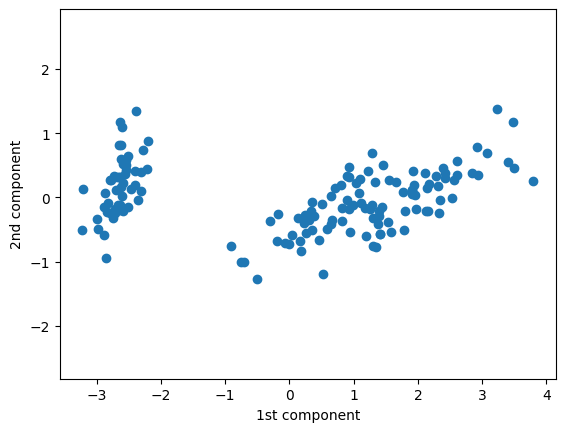

In [22]:
plt.scatter(Xd[:, 0], Xd[:, 1])
plt.axis('equal')
plt.xlabel('1st component')
plt.ylabel('2nd component')